#### Date Science Blog Assignment -- Happiness Index

Looking at the happiness index from the Kaggle dataset "https://www.kaggle.com/unsdsn/world-happiness"
This dataset is from 2015 - 2019. Countries are ranked by happiness and factors that contribute to a happiness score. For the purpose of the assignment I would like to answer the following:

    1. How do these factors impact the happiness score in the latest data set
    2 If we look at all the years what is the major factors
    3 Does the data suggest differences based on income of a country
    

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline



Load in all the files and check data sets. Checking the columns in the data so that we can make them uniform and discard the columns not needed in each dataframe

In [208]:
df_2015 = pd.read_csv('./2015.csv')
df_2016 = pd.read_csv('./2016.csv')
df_2017 = pd.read_csv('./2017.csv')
df_2018 = pd.read_csv('./2018.csv')
df_2019 = pd.read_csv('./2019.csv')

display(df_2015.head(2))
display(df_2016.head(2))
display(df_2017.head(2))
display(df_2018.head(2))
display(df_2019.head(2))


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


Overall Ranking doesnt assist with the analysis as we only want to see variables impacting score
The statistic metrics dont assist with the analysis so can be dropped

In [209]:
df_2015_clean = df_2015.drop(columns = ['Happiness Rank', 'Region', 'Standard Error', 'Dystopia Residual'])
df_2016_clean = df_2016.drop(columns = ['Happiness Rank', 'Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df_2017_clean = df_2017[['Country', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
                         'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
df_2018_clean = df_2018[['Country or region', 'Score','GDP per capita', 'Social support','Healthy life expectancy', 
                         'Freedom to make life choices','Perceptions of corruption', 'Generosity']]
df_2019_clean = df_2019[['Country or region', 'Score','GDP per capita', 'Social support','Healthy life expectancy', 
                         'Freedom to make life choices','Perceptions of corruption', 'Generosity']]


display(df_2015_clean.head(1))
print(df_2015_clean.shape[1])
print(df_2015_clean.isna().sum().sum())

display(df_2016_clean.head(1))
print(df_2016_clean.shape[1])
print(df_2016_clean.isna().sum().sum())

display(df_2017_clean.head(1))
print(df_2017_clean.shape[1])
print(df_2017_clean.isna().sum().sum())

display(df_2018_clean.head(1))
print(df_2018_clean.shape[1])
print(df_2018_clean.isna().sum().sum())

display(df_2019_clean.head(1))
print(df_2019_clean.shape[1])
print(df_2019_clean.isna().sum().sum())

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


8
0


,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


8
0


,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012


8
0


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202


8
1


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.769,1.34,1.587,0.986,0.596,0.393,0.153


8
0


In [210]:
df_2018_clean.fillna(df_2018_clean.mean())

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256
...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.064,0.083
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.097,0.270
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.106,0.224
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.038,0.218


Rename the columns so that each dataset matches. I will map the columns to the 2018 and 2019 labels.

In [211]:
df_2015_clean.rename(columns={'Country': 'Country or region',
                              'Happiness Score': 'Score',
                              'Economy (GDP per Capita)': 'GDP per capita',
                              'Family': 'Social support',
                              'Health (Life Expectancy)': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust (Government Corruption)': 'Perceptions of corruption' 
                             }, inplace=True)

df_2016_clean.rename(columns={'Country': 'Country or region',
                              'Happiness Score': 'Score',
                              'Economy (GDP per Capita)': 'GDP per capita',
                              'Family': 'Social support',
                              'Health (Life Expectancy)': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust (Government Corruption)': 'Perceptions of corruption' 
                             }, inplace=True)

df_2017_clean = df_2017_clean.rename(columns={'Country': 'Country or region',
                              'Happiness.Score': 'Score',
                              'Economy..GDP.per.Capita.': 'GDP per capita',
                              'Family': 'Social support',
                              'Health..Life.Expectancy.': 'Healthy life expectancy',
                              'Freedom': 'Freedom to make life choices',
                              'Trust..Government.Corruption.': 'Perceptions of corruption' 
                             })


display(df_2015_clean.head(1))
display(df_2016_clean.head(1))
display(df_2017_clean.head(1))
display(df_2018_clean.head(1))
display(df_2019_clean.head(1))


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202


,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
0,Finland,7.769,1.34,1.587,0.986,0.596,0.393,0.153


Check for null values. All data is numerical only country is categorical but it should be excluded from the linear regression model as a country will only have one record per file

In [212]:
print(df_2015_clean.isna().sum().sum())
print(df_2016_clean.isna().sum().sum())
print(df_2017_clean.isna().sum().sum())
print(df_2018_clean.isna().sum().sum())
print(df_2019_clean.isna().sum().sum())

0
0
0
1
0


In [213]:
df_2018_clean = df_2018_clean.fillna(df_2018_clean.mean())

<AxesSubplot:>

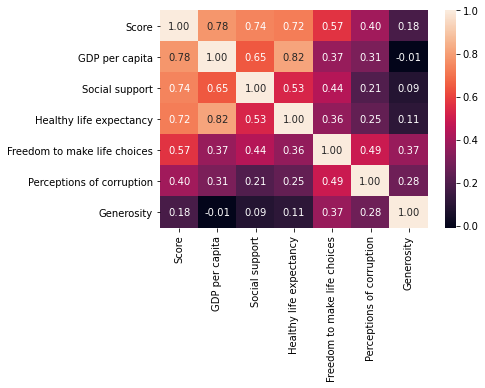

In [214]:
display(sns.heatmap(df_2015_clean.corr(), annot=True, fmt=".2f"))

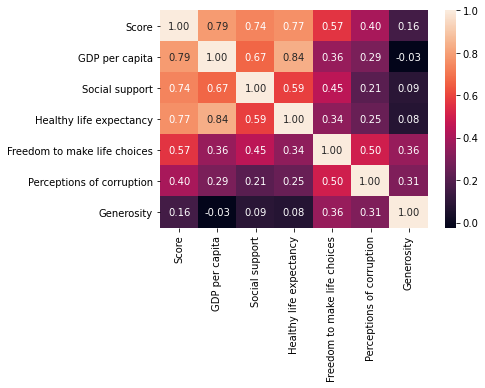

In [215]:
sns.heatmap(df_2016_clean.corr(), annot=True, fmt=".2f");

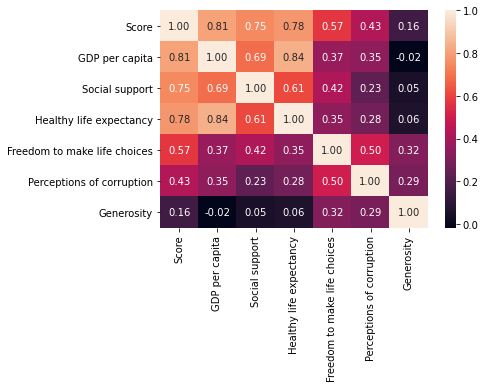

In [216]:
sns.heatmap(df_2017_clean.corr(), annot=True, fmt=".2f");

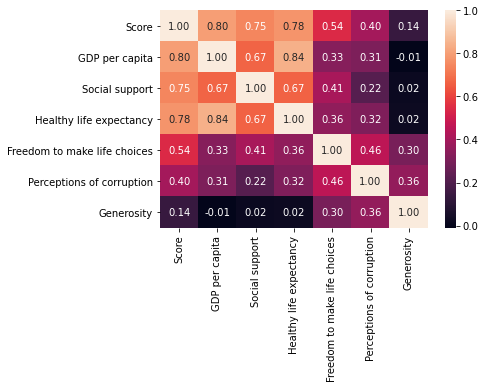

In [217]:
sns.heatmap(df_2018_clean.corr(), annot=True, fmt=".2f");

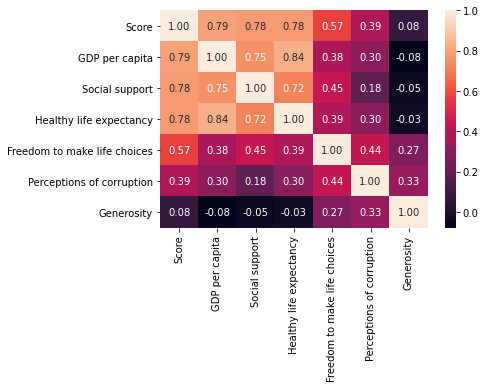

In [218]:
sns.heatmap(df_2019_clean.corr(), annot=True, fmt=".2f");

In [219]:
display(df_2015_clean.corr())
display(df_2016_clean.corr())
display(df_2017_clean.corr())
display(df_2018_clean.corr())
display(df_2019_clean.corr())

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
GDP per capita,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Social support,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Healthy life expectancy,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom to make life choices,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Perceptions of corruption,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848
GDP per capita,0.790322,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531
Social support,0.739252,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629
Healthy life expectancy,0.765384,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987
Freedom to make life choices,0.566827,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751
Perceptions of corruption,0.402032,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930
Generosity,0.156848,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.812469,0.752737,0.781951,0.570137,0.429080,0.155256
GDP per capita,0.812469,1.000000,0.688296,0.843077,0.369873,0.350944,-0.019011
Social support,0.752737,0.688296,1.000000,0.612080,0.424966,0.231841,0.051693
Healthy life expectancy,0.781951,0.843077,0.612080,1.000000,0.349827,0.279752,0.063191
Freedom to make life choices,0.570137,0.369873,0.424966,0.349827,1.000000,0.499183,0.316083
Perceptions of corruption,0.429080,0.350944,0.231841,0.279752,0.499183,1.000000,0.294159
Generosity,0.155256,-0.019011,0.051693,0.063191,0.316083,0.294159,1.000000


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.802124,0.745760,0.775814,0.544280,0.403234,0.135825
GDP per capita,0.802124,1.000000,0.672080,0.844273,0.332275,0.309626,-0.011241
Social support,0.745760,0.672080,1.000000,0.667288,0.411087,0.216877,0.018226
Healthy life expectancy,0.775814,0.844273,0.667288,1.000000,0.355475,0.315481,0.020751
Freedom to make life choices,0.544280,0.332275,0.411087,0.355475,1.000000,0.460788,0.297988
Perceptions of corruption,0.403234,0.309626,0.216877,0.315481,0.460788,1.000000,0.362246
Generosity,0.135825,-0.011241,0.018226,0.020751,0.297988,0.362246,1.000000


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.385613,0.075824
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,0.298920,-0.079662
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,0.181899,-0.048126
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,0.295283,-0.029511
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.438843,0.269742
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,1.000000,0.326538
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,0.326538,1.000000


In [220]:
def clean_fit_linear_mod(df, response_col, test_size=0.1, rand_state=42):
    

    #Split into explanatory and response variables
    X = df.select_dtypes(include=['float', 'int'])
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


def coef_weights(coefficients, X_train):
   
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df



In [221]:
#2015 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2015_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))


The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,1.335755e-15,1.335755e-15
4,Freedom to make life choices,8.351949e-16,8.351949e-16
3,Healthy life expectancy,6.160270e-16,6.160270e-16
6,Generosity,-4.861920e-16,4.861920e-16
1,GDP per capita,4.267783e-16,4.267783e-16
2,Social support,4.101618e-16,4.101618e-16


In [222]:
#2016 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2016_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
4,Freedom to make life choices,-9.257464e-16,9.257464e-16
3,Healthy life expectancy,8.215907e-16,8.215907e-16
1,GDP per capita,-7.746485e-16,7.746485e-16
6,Generosity,5.303546e-16,5.303546e-16
2,Social support,1.555720e-16,1.555720e-16
5,Perceptions of corruption,9.843446e-17,9.843446e-17


In [223]:
#2017 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2017_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,1.675802e-15,1.675802e-15
3,Healthy life expectancy,1.291760e-15,1.291760e-15
2,Social support,1.149606e-15,1.149606e-15
4,Freedom to make life choices,8.704550e-16,8.704550e-16
1,GDP per capita,3.929048e-16,3.929048e-16
6,Generosity,-3.381224e-16,3.381224e-16


In [224]:
results(df_2017_clean)

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,1.675802e-15,1.675802e-15
3,Healthy life expectancy,1.291760e-15,1.291760e-15
2,Social support,1.149606e-15,1.149606e-15
4,Freedom to make life choices,8.704550e-16,8.704550e-16
1,GDP per capita,3.929048e-16,3.929048e-16
6,Generosity,-3.381224e-16,3.381224e-16


In [225]:
#2018 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2018_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,1.647255e-15,1.647255e-15
4,Freedom to make life choices,7.663345e-16,7.663345e-16
6,Generosity,4.148305e-16,4.148305e-16
1,GDP per capita,2.911264e-16,2.911264e-16
3,Healthy life expectancy,1.916480e-16,1.916480e-16
2,Social support,1.093820e-16,1.093820e-16


In [226]:
#2019 Date
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_2019_clean, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
5,Perceptions of corruption,-1.675088e-15,1.675088e-15
6,Generosity,5.587621e-16,5.587621e-16
4,Freedom to make life choices,-4.377495e-16,4.377495e-16
3,Healthy life expectancy,3.734223e-16,3.734223e-16
2,Social support,2.418711e-16,2.418711e-16
1,GDP per capita,-1.065976e-16,1.065976e-16


Would like to see

In [235]:
df_group = df_2015_clean.append(df_2016_clean.append(df_2017_clean.append(df_2018_clean.append(df_2019_clean))))
df_group.sort_values('Score', ascending=True).head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity
154,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876
157,Togo,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810
155,South Sudan,2.853,0.306000,0.575000,0.295000,0.010000,0.091000,0.202000
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435
156,Burundi,2.905,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900


In [228]:
#All dates
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_group, 'Score')

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
display(coef_df.head(20))

The rsquared on the training data was 1.0.  The rsquared on the test data was 1.0.


,est_int,coefs,abs_coefs
0,Score,1.000000e+00,1.000000e+00
6,Generosity,1.042041e-15,1.042041e-15
4,Freedom to make life choices,-7.441010e-16,7.441010e-16
2,Social support,-4.059223e-16,4.059223e-16
5,Perceptions of corruption,3.306628e-16,3.306628e-16
3,Healthy life expectancy,3.174334e-16,3.174334e-16
1,GDP per capita,-2.310283e-16,2.310283e-16
